# Credit score classification project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
import seaborn as sns

# Train test split
First of all we need to split our data into train, validation and test sets.

Even though there is a test set given in the competition files, we don't have any access to the target variables, so we decided to use train.csv file only

In [2]:
data = pd.read_csv('train.csv') # dataframe contains everything, not only train
# test = pd.read_csv('test.csv') this one doesn't works - missing target value

test_size = 0.2
X = data.drop(columns=["Credit_Score"]).copy()
y = data["Credit_Score"] # the target 


X_rem, X_test, y_rem, y_test = train_test_split(X,y, test_size=test_size, shuffle=False) 
X_train, X_val, y_train, y_val = train_test_split(X_rem, y_rem, test_size=test_size, shuffle=False)

In [3]:
# merged in order to perfrom preprocessing efficiently
train = X_train.join(y_train)
val = X_val.join(y_val)

# Data Examination

Let's have a look into our data

In [4]:
train.head(5)

Unnamed: 0      ID Customer_ID     Month           Name   Age          SSN  \
0           0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265   
1           1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265   
2           2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265   
3           3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265   
4           4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265   

  Occupation Annual_Income  Monthly_Inhand_Salary  ...  Credit_Mix  \
0  Scientist      19114.12            1824.843333  ...           _   
1  Scientist      19114.12                    NaN  ...        Good   
2  Scientist      19114.12                    NaN  ...        Good   
3  Scientist      19114.12                    NaN  ...        Good   
4  Scientist      19114.12            1824.843333  ...        Good   

   Outstanding_Debt  Credit_Utilization_Ratio     Credit_History_Age  \
0            809.98                 26.822620  22 Years and 1 Months   
1            809.98                 31.944960                    NaN   
2            809.98                 28.609352  22 Years and 3 Months   
3            809.98                 31.377862  22 Years and 4 Months   
4            809.98                 24.797347  22 Years and 5 Months   

  Payment_of_Min_Amount  Total_EMI_per_month Amount_invested_monthly  \
0                    No            49.574949       80.41529543900253   
1                    No            49.574949      118.28022162236736   
2                    No            49.574949         81.699521264648   
3                    No            49.574949       199.4580743910713   
4                    No            49.574949      41.420153086217326   

                  Payment_Behaviour     Monthly_Balance Credit_Score  
0   High_spent_Small_value_payments  312.49408867943663         Good  
1    Low_spent_Large_value_payments  284.62916249607184         Good  
2   Low_spent_Medium_value_payments   331.2098628537912         Good  
3    Low_spent_Small_value_payments  223.45130972736786         Good  
4  High_spent_Medium_value_payments  341.48923103222177         Good  

[5 rows x 29 columns]

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40960 entries, 0 to 40959
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                40960 non-null  int64  
 1   ID                        40960 non-null  object 
 2   Customer_ID               40960 non-null  object 
 3   Month                     40960 non-null  object 
 4   Name                      36889 non-null  object 
 5   Age                       40960 non-null  object 
 6   SSN                       40960 non-null  object 
 7   Occupation                40960 non-null  object 
 8   Annual_Income             40960 non-null  object 
 9   Monthly_Inhand_Salary     34812 non-null  float64
 10  Num_Bank_Accounts         40960 non-null  int64  
 11  Num_Credit_Card           40960 non-null  int64  
 12  Interest_Rate             40960 non-null  int64  
 13  Num_of_Loan               40960 non-null  object 
 14  Type_o

In [6]:
train["Customer_ID"].value_counts().loc[train["Customer_ID"].value_counts() != 8].size 
# every customer shows up exactly 8 times

0

In [7]:
train['Credit_Score'].isna().sum() # all target values are present

0

(array([ 7319.,     0.,     0.,     0.,     0., 21607.,     0.,     0.,
            0., 12034.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

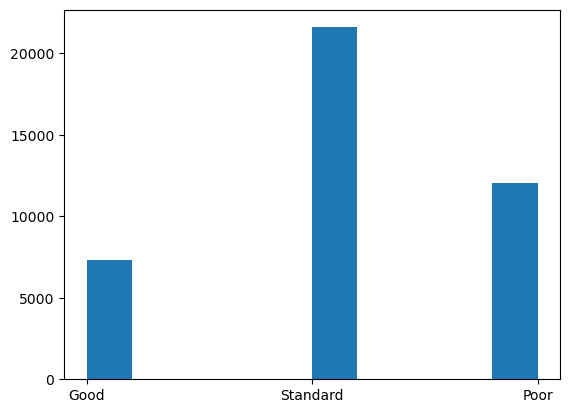

In [8]:
plt.hist(train["Credit_Score"]) # target distribution

In [9]:
train[["Name", "SSN", "Customer_ID"]].head(10) # name, customer id and SSN are redundant

Name          SSN Customer_ID
0    Aaron Maashoh  821-00-0265   CUS_0xd40
1    Aaron Maashoh  821-00-0265   CUS_0xd40
2    Aaron Maashoh  821-00-0265   CUS_0xd40
3    Aaron Maashoh  821-00-0265   CUS_0xd40
4    Aaron Maashoh  821-00-0265   CUS_0xd40
5    Aaron Maashoh  821-00-0265   CUS_0xd40
6    Aaron Maashoh  821-00-0265   CUS_0xd40
7              NaN    #F%$D@*&8   CUS_0xd40
8  Rick Rothackerj  004-07-5839  CUS_0x21b1
9  Rick Rothackerj  004-07-5839  CUS_0x21b1

In [10]:
columns_to_alter = ['Age', 'Annual_Income', 'Num_of_Loan','Num_of_Delayed_Payment',
                    'Changed_Credit_Limit', 'Outstanding_Debt',
                    'Amount_invested_monthly', 'Monthly_Balance']

train[columns_to_alter].iloc[10:20] # some columns have weird signs - "_" and are of wrong format

Age Annual_Income Num_of_Loan Num_of_Delayed_Payment Changed_Credit_Limit  \
10  28     34847.84_           1                     -1                 5.42   
11  28      34847.84           1                     3_                 5.42   
12  28      34847.84           1                      1                 6.42   
13  28      34847.84           1                      0                 5.42   
14  28      34847.84           1                      4                 5.42   
15  28      34847.84           1                      4                 5.42   
16  34     143162.64           3                      8                  7.1   
17  34     143162.64           3                      6                  7.1   
18  34     143162.64           3                      7                 11.1   
19  34     143162.64           3                      5                  9.1   

   Outstanding_Debt Amount_invested_monthly     Monthly_Balance  
10           605.03       58.51597569589465  466.46647639764313  
11           605.03       99.30622796053305   465.6762241330048  
12           605.03      130.11542024292334   444.8670318506144  
13           605.03      43.477190144355745    481.505261949182  
14           605.03       70.10177420755677   464.8806778859809  
15           605.03      218.90434353388733  356.07810855965045  
16          1303.01        168.413702679309  1043.3159778669492  
17          1303.01      232.86038375993544   998.8692967863226  
18          1303.01               __10000__    715.741367403555  
19          1303.01       825.2162699393922   426.5134106068658

In [11]:
# how different are categorical columns

print(train['Payment_of_Min_Amount'].unique(), "\n\n",
      train['Occupation'].unique(), "\n\n",
      train["Credit_Mix"].unique(), "\n\n",
      train["Payment_Behaviour"].unique())

['No' 'NM' 'Yes'] 

 ['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect'] 

 ['_' 'Good' 'Standard' 'Bad'] 

 ['High_spent_Small_value_payments' 'Low_spent_Large_value_payments'
 'Low_spent_Medium_value_payments' 'Low_spent_Small_value_payments'
 'High_spent_Medium_value_payments' '!@9#%8'
 'High_spent_Large_value_payments']


In [12]:
# account age, and behaviour are in unfriendly format

train[["Credit_History_Age", "Payment_Behaviour"]].head()

Credit_History_Age                 Payment_Behaviour
0  22 Years and 1 Months   High_spent_Small_value_payments
1                    NaN    Low_spent_Large_value_payments
2  22 Years and 3 Months   Low_spent_Medium_value_payments
3  22 Years and 4 Months    Low_spent_Small_value_payments
4  22 Years and 5 Months  High_spent_Medium_value_payments

<AxesSubplot:>

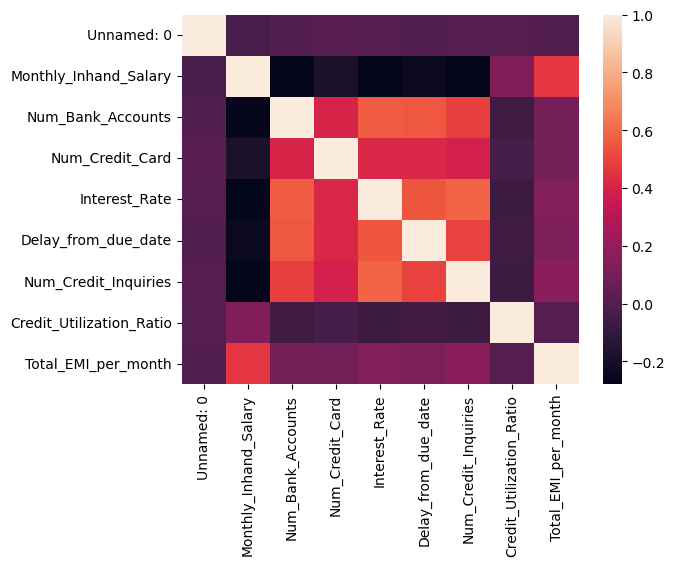

In [13]:
sns.heatmap(train.corr(method="spearman"))

## Search for outliers

In [14]:
description = train.describe()

print(description)

        Unnamed: 0  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
count  40960.00000           34812.000000       40960.000000     40960.000000   
mean   20479.50000            4217.089841          16.971045        23.338965   
std    11824.27785            3210.917156         117.598061       132.664174   
min        0.00000             332.128333          -1.000000         0.000000   
25%    10239.75000            1643.700833           3.000000         4.000000   
50%    20479.50000            3091.000000           6.000000         6.000000   
75%    30719.25000            5971.186667           7.000000         7.000000   
max    40959.00000           15136.696667        1798.000000      1499.000000   

       Interest_Rate  Delay_from_due_date  Num_Credit_Inquiries  \
count    40960.00000         40960.000000          40177.000000   
mean        69.84917            21.100342             26.384474   
std        454.97453            14.846166            184.448375   
mi

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Customer_ID'}>,
        <AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'Name'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SSN'}>,
        <AxesSubplot:title={'center':'Occupation'}>,
        <AxesSubplot:title={'center':'Annual_Income'}>,
        <AxesSubplot:title={'center':'Monthly_Inhand_Salary'}>],
       [<AxesSubplot:title={'center':'Num_Bank_Accounts'}>,
        <AxesSubplot:title={'center':'Num_Credit_Card'}>,
        <AxesSubplot:title={'center':'Interest_Rate'}>,
        <AxesSubplot:title={'center':'Num_of_Loan'}>,
        <AxesSubplot:title={'center':'Type_of_Loan'}>],
       [<AxesSubplot:title={'center':'Delay_from_due_date'}>,
        <AxesSubplot:title={'center':'Num_of_Delayed_Payment'}>,
        <AxesSubplot:title={'center':'Changed_Credit_Limit'}>,
        <Axe

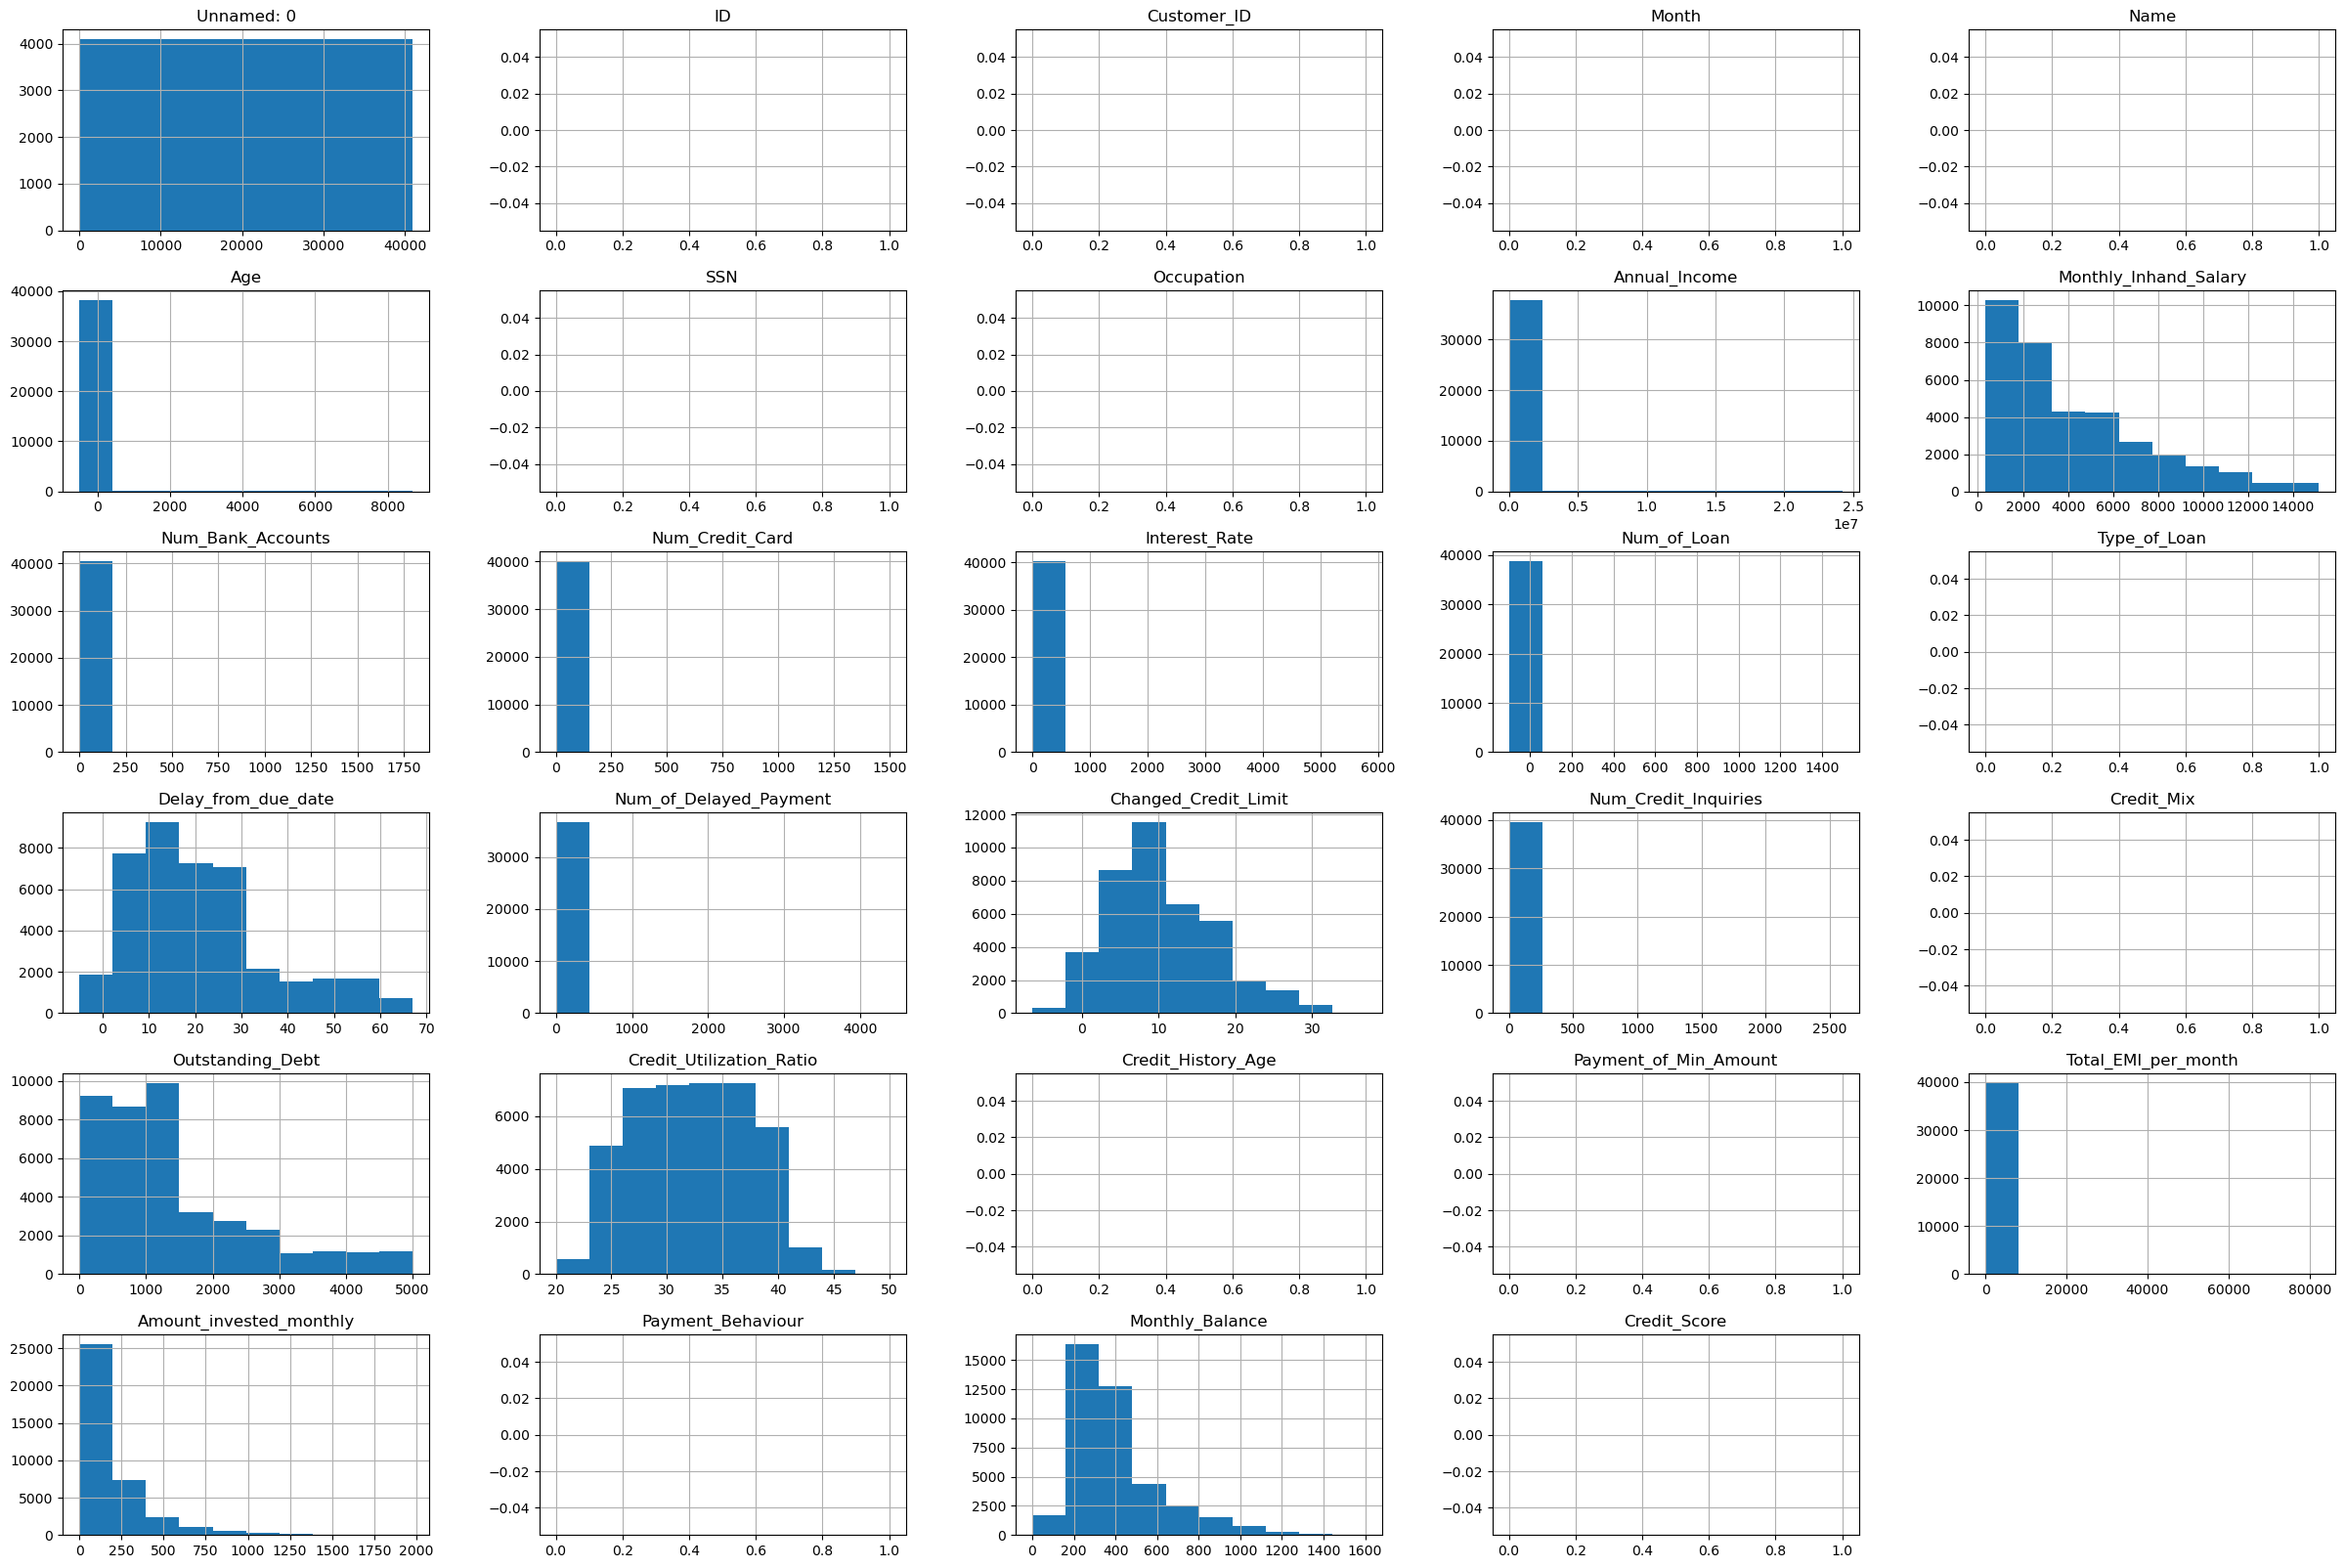

In [15]:
df = train.copy()
for col in train.columns:
    df[col] = pd.to_numeric(train[col], errors='coerce') # errors='coerce', then invalid parsing will be set as NaN

# distribution of all the variables
df.hist(figsize=(30, 20))

Some of the plots look very unusual - they consist of only one column. 
It probably means that those features contain some outliers.

In [16]:
# we choose outliers by looking at the plots

columns_with_outliers = ["Age", "Annual_Income", "Num_Bank_Accounts", 
                         "Num_Credit_Card", "Interest_Rate", 
                         "Num_of_Loan", "Num_of_Delayed_Payment",
                         "Num_Credit_Inquiries", "Total_EMI_per_month"]


df[columns_with_outliers].quantile(0.98)

Age                           56.00
Annual_Income             167860.16
Num_Bank_Accounts             10.00
Num_Credit_Card              218.82
Interest_Rate                 34.00
Num_of_Loan                    9.00
Num_of_Delayed_Payment        25.00
Num_Credit_Inquiries          16.00
Total_EMI_per_month        28656.02
Name: 0.98, dtype: float64

<AxesSubplot:>

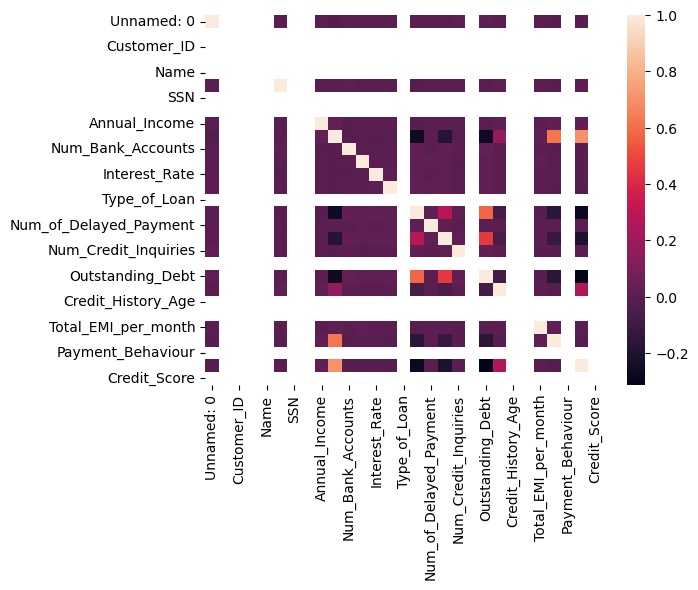

In [17]:
# correlation between columns 
sns.heatmap(df.corr())

<BarContainer object of 3 artists>

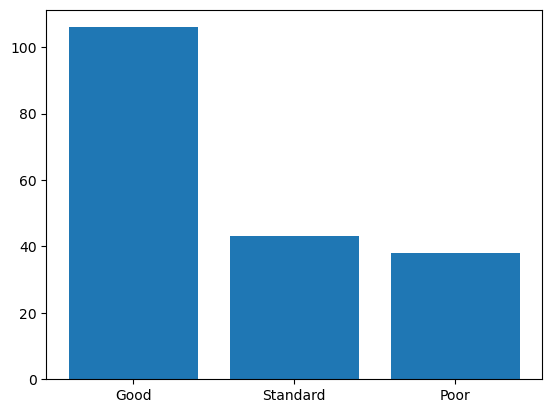

In [18]:
# Monthly_Inhand_Salary is strongly correlated with Monthly_Balance and 
# Amount_Invested_Monthly but those are not correlated with each other

plt.bar(x = train["Credit_Score"].unique(),
        height=train.loc[df["Num_of_Loan"]>=15]["Credit_Score"].value_counts())

# Data Preprocessing

First of all we git rid of columns that carry the same information

In [19]:
def id_columns(df):
    df = df.drop(["Name", "SSN", "ID"], axis="columns") # no added value, all the information in Customer_ID
    df["Customer_ID"] = df["Customer_ID"].apply(lambda x: int(x[4:], 16)) # convert to int
    
    print("Columns containing id-like information preprocessed")
    return df

Here we literally 'clean' the data, removing unnecessary signs that appear randomly

In [20]:
def clear_numeric_data(col):
    # some of the rows contain "_" sign
    col.astype(str).replace("_", "")
    return pd.to_numeric(col, errors="coerce") # errors='coerce', then invalid parsing will be set as NaN

In [21]:
# function for cleaning numeric data where necessary
def altering(df):
    
    columns_to_alter = ['Age', 'Annual_Income', 'Num_of_Loan','Num_of_Delayed_Payment',
                        'Changed_Credit_Limit', 'Outstanding_Debt',
                        'Amount_invested_monthly', 'Monthly_Balance']

    df[columns_to_alter] = df[columns_to_alter].apply(clear_numeric_data, axis=1)

    print("Numeric data preprocessed. Columns with numeric values contain numeric only variables. Changed columns types")
    return df

Function below helps with removal outlying values from a column.
If parameter (use_quantiles) is False, removes outliers outside given set range (a, b).
Otherwise removes top 2 quantiles

In [22]:
def delete_outliers(column, a=0, b=0.98, use_quantiles=True):
    # function helps removing quantiles from a column, 
    # if parameter (use_quantiles) is False, removes outliers outside given range (a, b)
    # otherwise removes top quantiles
    
    col = np.where(a < column, column, float('nan'))
    if use_quantiles:
        return np.where(col <= column.quantile(b), column, float('nan'))
    return np.where(col <= b, column, float('nan'))


def handle_outliers(df):
    df["Age"] = np.where((0 > df["Age"]), -df["Age"], df["Age"]) # deleting weird outliers
    df['Age'] = delete_outliers(df["Age"], 0, 100, use_quantiles=False)
    
    df["Annual_Income"] = delete_outliers(df["Annual_Income"])
    df["Num_Bank_Accounts"] = delete_outliers(df["Num_Bank_Accounts"])
    df["Num_of_Loan"] = delete_outliers(df["Num_of_Loan"])
    df["Interest_Rate"] = delete_outliers(df["Interest_Rate"])
    df["Num_Credit_Card"] = delete_outliers(df["Num_Credit_Card"], 0, 0.97)
    df["Num_of_Delayed_Payment"] = delete_outliers(df["Num_of_Delayed_Payment"])
    df["Num_Credit_Inquiries"] = delete_outliers(df["Num_Credit_Inquiries"])
    df["Total_EMI_per_month"] = delete_outliers(df["Total_EMI_per_month"], 0, 0.95)


    print("Deleted outliers")   
    
    return df

## Encoding categorical data

In [23]:
train["Occupation"] = np.where(train["Occupation"] == "_______", "Unknown", train["Occupation"])
occupations_list = train["Occupation"].unique()
occupations_list

array(['Scientist', 'Unknown', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

Sometimes when data is missing, it's possible to avail rows that pertain to the same customer and contain missing information.

In [24]:
# first we fill the information for customers that have other rows with full information available
train['Type_of_Loan'].fillna(train.groupby('Customer_ID')['Type_of_Loan'].first(), inplace=True)
# later we fill with ''
train['Type_of_Loan'].fillna('', inplace=True)
    
loan_types_list =  train['Type_of_Loan'].value_counts().head(9).index[1:] 

In [25]:
def encode_categorical(df):
    # encode columns where necessary (Credit_Mix, Payment_of_Min_Amount, Credit_Score)
    # mapping
    credit_mix_dict = {'Bad':0, 'Standard':1, 'Good':2, '_':float('nan')}
    poma_dict = {'No':0, 'Yes':1, 'NM':float('nan')}
    credit_score_dict = {'Poor':0, 'Standard':1, 'Good':2}
    month_dict = {"January": 1, "February": 2, "March": 3, "April": 4, "May": 5,
                "June": 6, "July": 7, "August": 8}
    
    df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].map(poma_dict)
    df['Credit_Mix'] = df['Credit_Mix'].map(credit_mix_dict)
    df['Credit_Score'] = df['Credit_Score'].map(credit_score_dict)
    df["Month"] = df["Month"].map(month_dict)
    
    # Payment_Behaviour column brings two informations, one about spending, other about value payments
    df["Payment_Behaviour"] = df["Payment_Behaviour"].replace('!@9#%8', 'Unknown_spent_Unknown_value_payments')
    split_payment = lambda x:  ([x.split("_")[0], x.split("_")[2]] if (x is not None) else ["Unknown", "Unknown"])
    df["Payment_Behaviour"] = df["Payment_Behaviour"].apply(split_payment)
    df[["Spending_Behaviour", "Value_Payments"]] = pd.DataFrame(df["Payment_Behaviour"].tolist(), index=df.index)
    
    spending_dict = {'Low':0, 'High':1, 'Unknown':float('nan')}
    value_dict = {'Small':0, 'Medium':1, 'Large':2,  'Unknown':float('nan')}
    df['Spending_Behaviour'] = df['Spending_Behaviour'].map(spending_dict)
    df['Value_Payments'] = df['Value_Payments'].map(value_dict)
    
    del df["Payment_Behaviour"]
    
    
    for loan_type in loan_types_list: # the single types of loans
        df[loan_type] = df['Type_of_Loan'].str.contains(loan_type).astype("bool")
    del df["Type_of_Loan"]
    
    
    # credit history age    
    df['Credit_History_Age'] = df['Credit_History_Age'].apply(history_age)
    
    # Occupation - ____ for uneployed
    df["Occupation"] = np.where(df["Occupation"] == "_______", "Unknown", df["Occupation"])
    df["Occupation"] = np.where(df["Occupation"].isin(occupations_list), df["Occupation"], "Unknown") # to handle different occupations in test data
    df = df.join(pd.get_dummies(df['Occupation']))
    del df["Occupation"]

    print("Categorical columns with string values encoded. Added new columns where necessary (one-hot encoding)")
    
    return df

## handling NaNs

We will impute missing data. In case of some values we look up to rows containing
data about the same customer, using mode/median of values pertaining to him. If for customer
there are no other rows, we impute using globally most common values.

In [26]:
def impute_values(df): # this works but very slowly
    
    continuous_values = ['Monthly_Inhand_Salary', 'Amount_invested_monthly',
                         'Monthly_Balance', 'Credit_History_Age', "Outstanding_Debt",
                         "Changed_Credit_Limit", "Annual_Income"]
    
    for column in continuous_values:
        df[column] = df[column].fillna(df.groupby('Customer_ID')[column].transform("mean"))
    # using mean is not causing any trouble here, we're practically taking the value that appears
    # in the rows with the same id
        
    
    discrete_columns = ["Age", "Num_Credit_Inquiries", "Num_of_Loan", "Credit_Mix",
                        "Num_of_Delayed_Payment", "Num_Credit_Inquiries", 
                        "Spending_Behaviour", "Payment_of_Min_Amount", "Value_Payments"]
    # for discrete values we'll impute nans with mode
    for column in discrete_columns:
        #train[column].fillna(train.groupby('Customer_ID')[column].agg(lambda x: pd.Series.mode(x)[0]), inplace=True) 
        df[column].fillna(df.groupby('Customer_ID')[column].transform('median'), inplace=True) 
        pass
    
    df = df.fillna(df.median()) # in case a customer doesn't have any entries


    print("NA values imputed within numeric columns")

    return df


In [27]:
# processing Credit_History_Age so that's continuous
import re
def history_age(age):
    try : 
        years = int(re.findall('[0-9]+', age)[0])
        month = int(re.findall('[0-9]+', age)[1])
        return years*12 + month
    except :
        return np.nan
    
import re

In [28]:
def impute_discrete_string(df):

    discrete_string_columns = ["Occupation", "Type_of_Loan", "Payment_Behaviour"]
    # fill missing data in columns that are strings

    for column in discrete_string_columns:
        most_common_globally = df[column].agg(lambda x: pd.Series.mode(x)[0])
        df[column].fillna(df.groupby('Customer_ID')[column].agg(
            lambda x: (most_common_globally if len(pd.Series.mode(x)) == 0 else pd.Series.mode(x)[0])
            ), inplace=True) 
        

    print("NA values imputed within text columns")
        
    return df

## Pipeline

In [29]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

drop_transformer = FunctionTransformer(id_columns)
altering_transformer = FunctionTransformer(altering)
outlier_transformer = FunctionTransformer(handle_outliers)
categorical_transformer = FunctionTransformer(encode_categorical)
imputer_transformer = FunctionTransformer(impute_values)
discrete_imputer_transformer = FunctionTransformer(impute_discrete_string)

# all the afore declared processings applied
prepipe = Pipeline([
    ("drop", drop_transformer),
    ("altering", altering_transformer),
    ("outliers", outlier_transformer),
    ("impute_discrete_string", discrete_imputer_transformer),
    ("categorical", categorical_transformer),
    ("impute", imputer_transformer)
])


In [30]:
train = prepipe.fit_transform(train)

Columns containing id-like information preprocessed
Numeric data preprocessed. Columns with numeric values contain numeric only variables. Changed columns types
Deleted outliers
NA values imputed within text columns
Categorical columns with string values encoded. Added new columns where necessary (one-hot encoding)
NA values imputed within numeric columns


In [31]:
# check outliers - we change the outliers pipe
described = train.describe()

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'Customer_ID'}>,
        <AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Annual_Income'}>,
        <AxesSubplot:title={'center':'Monthly_Inhand_Salary'}>],
       [<AxesSubplot:title={'center':'Num_Bank_Accounts'}>,
        <AxesSubplot:title={'center':'Num_Credit_Card'}>,
        <AxesSubplot:title={'center':'Interest_Rate'}>,
        <AxesSubplot:title={'center':'Num_of_Loan'}>,
        <AxesSubplot:title={'center':'Delay_from_due_date'}>,
        <AxesSubplot:title={'center':'Num_of_Delayed_Payment'}>],
       [<AxesSubplot:title={'center':'Changed_Credit_Limit'}>,
        <AxesSubplot:title={'center':'Num_Credit_Inquiries'}>,
        <AxesSubplot:title={'center':'Credit_Mix'}>,
        <AxesSubplot:title={'center':'Outstanding_Debt'}>,
        <AxesSubplot:title={'center':'Credit_Utilization_Ratio'}>,
        <AxesSubp

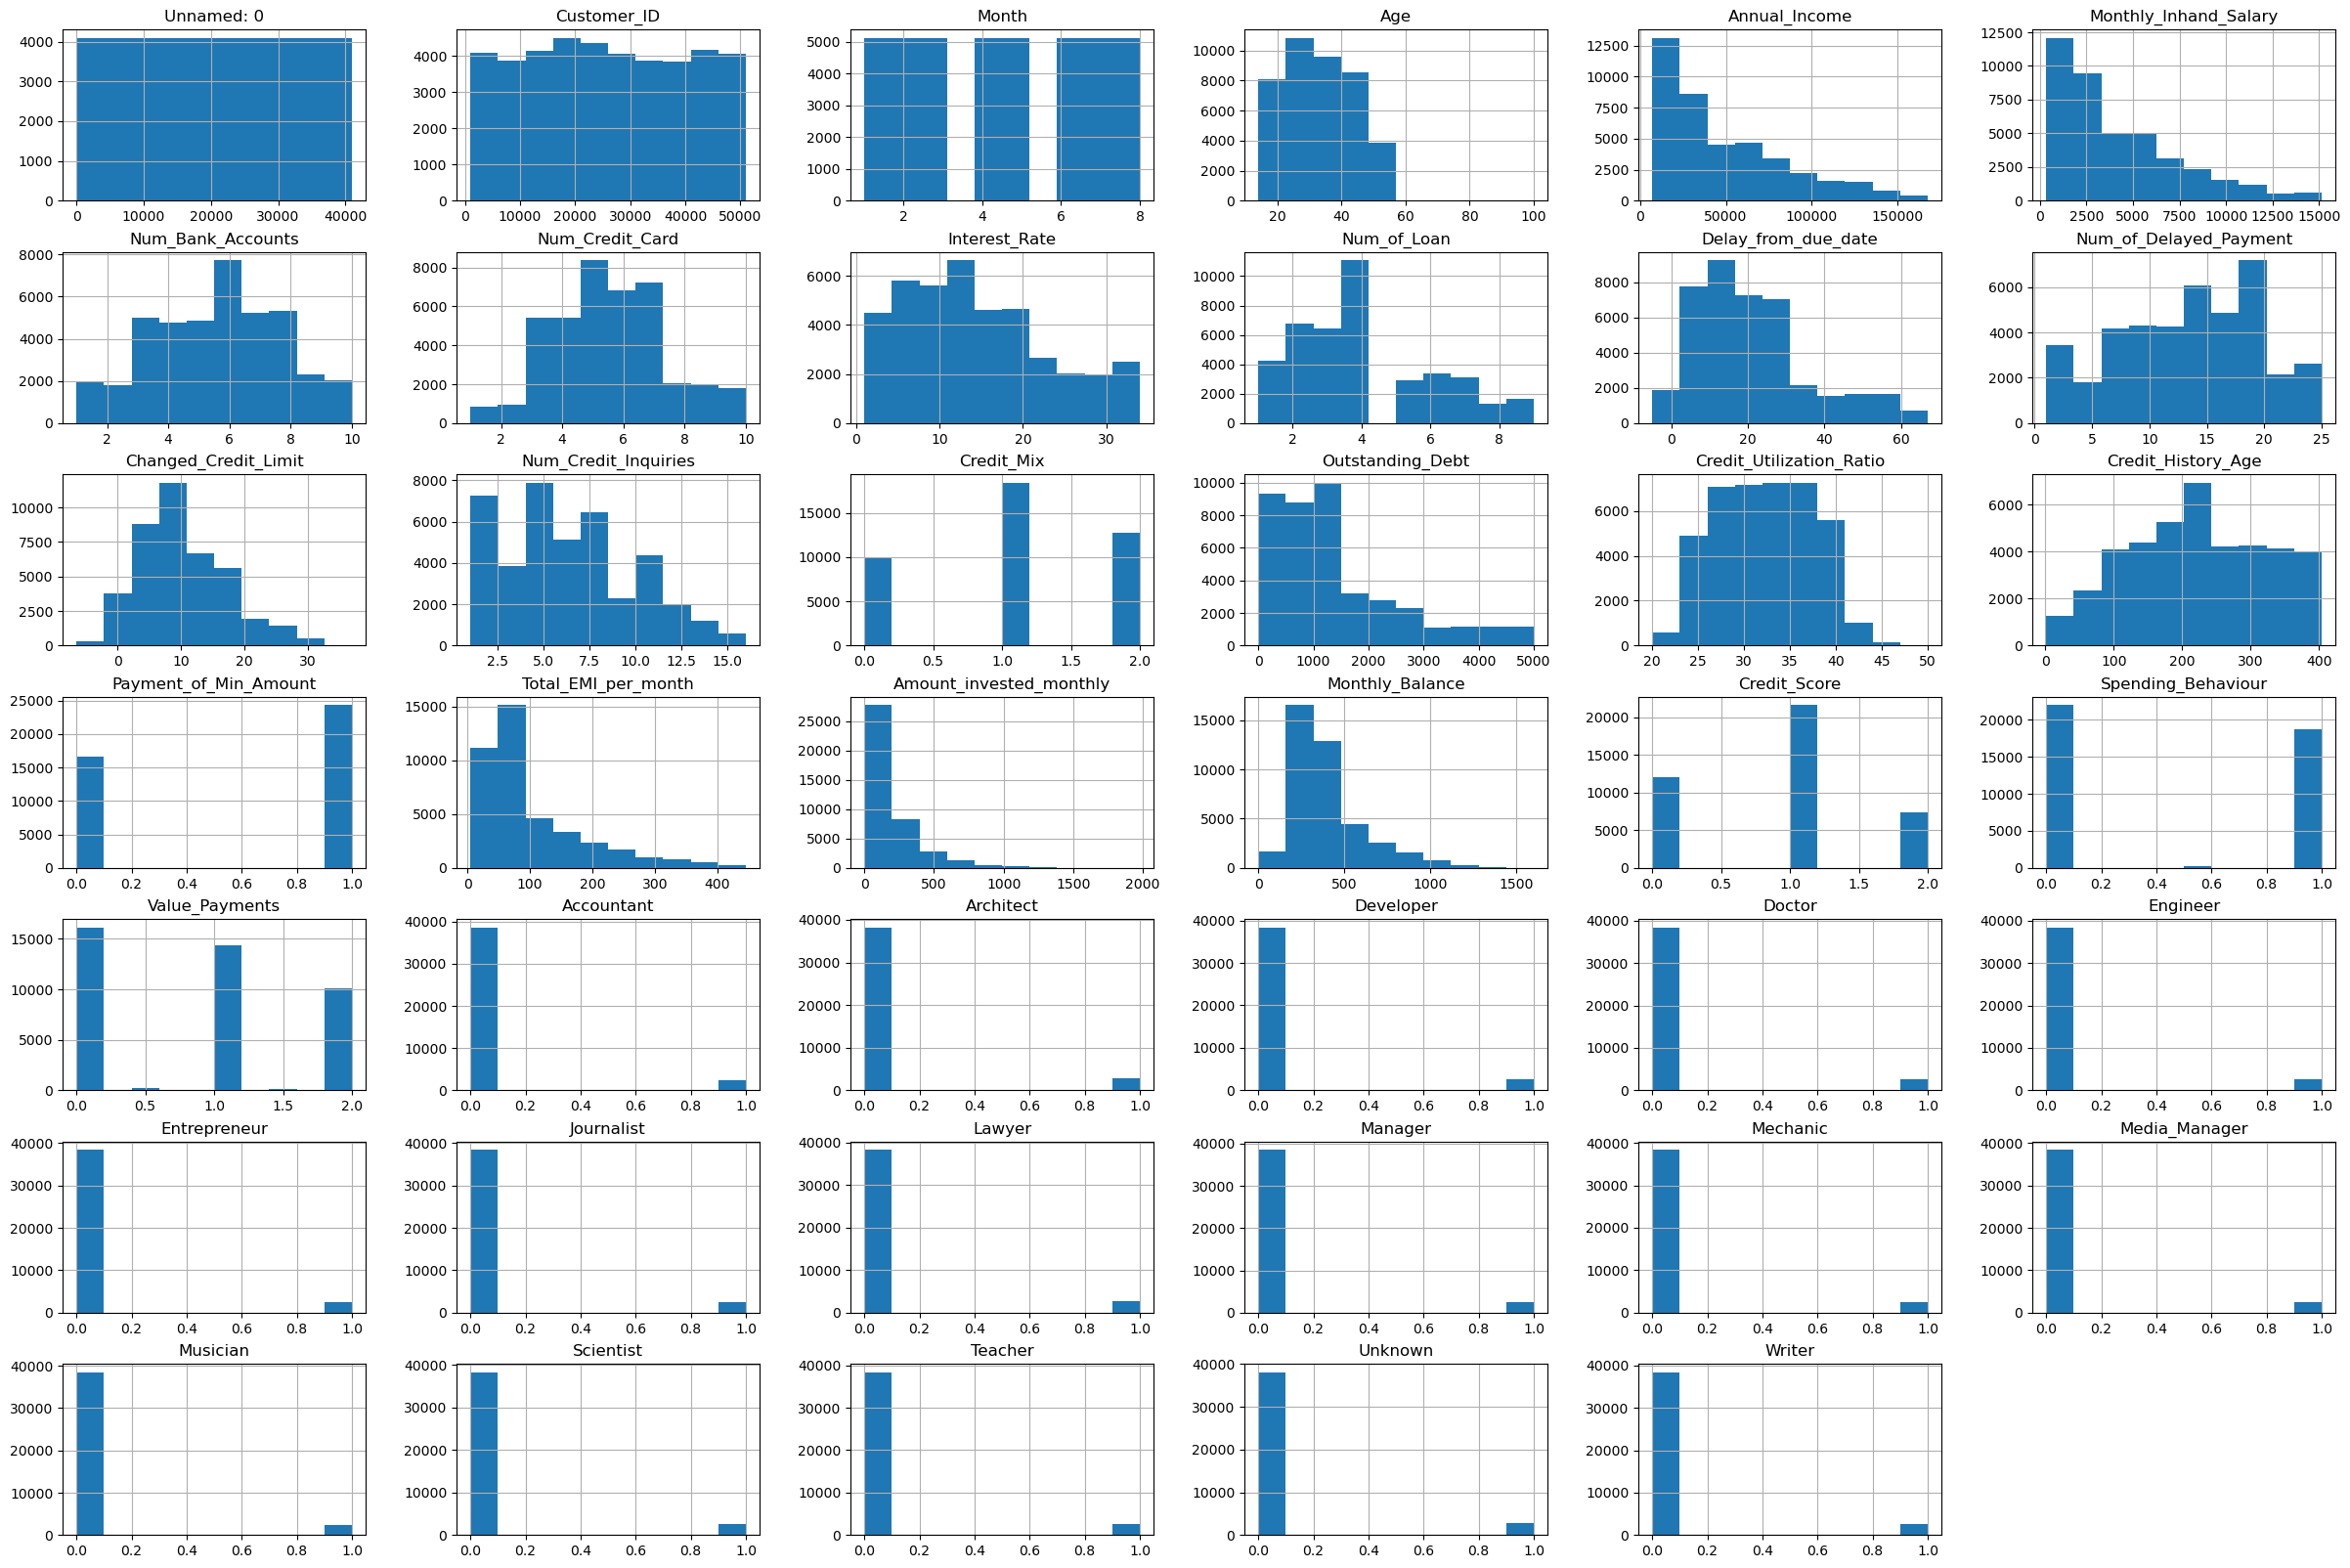

In [32]:
train.hist(figsize=(30, 20))

<AxesSubplot:>

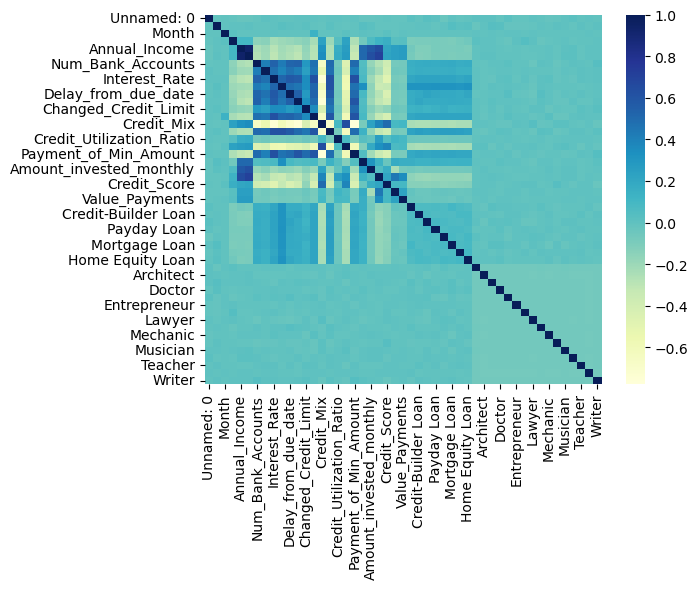

In [33]:
sns.heatmap(train.corr(), cmap="YlGnBu")

# Model

We will initially create the models, to check which features have the highest importance.
Our intention is to drop the irrelevant later after the 1st model fitting.

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [35]:
# training dataset
y = train['Credit_Score']
del train['Credit_Score']
y_train = y
X_train = train

In [36]:
# validation dataset
val = prepipe.transform(val)
X_val = val
y_val = val["Credit_Score"]
del X_val["Credit_Score"]

Columns containing id-like information preprocessed
Numeric data preprocessed. Columns with numeric values contain numeric only variables. Changed columns types
Deleted outliers
NA values imputed within text columns
Categorical columns with string values encoded. Added new columns where necessary (one-hot encoding)
NA values imputed within numeric columns


# Random Forest

1st fitting

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rf_model = RandomForestClassifier(n_estimators=120)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=120)

In [39]:
y_pred = rf_model.predict(X_val)

In [40]:
print(classification_report(y_pred, y_val))

              precision    recall  f1-score   support

           0       0.66      0.72      0.69      2714
           1       0.74      0.73      0.74      5535
           2       0.60      0.55      0.57      1991

    accuracy                           0.69     10240
   macro avg       0.67      0.67      0.67     10240
weighted avg       0.69      0.69      0.69     10240



# Verify feature importance in random forest model

In [41]:
feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                   X_val.columns,
                                   columns=['Importance'])

In [42]:
feature_importances.sort_values(by='Importance', ascending=False).head(10)

Importance
Outstanding_Debt           0.089478
Credit_Mix                 0.068240
Interest_Rate              0.061004
Credit_History_Age         0.058321
Delay_from_due_date        0.052716
Unnamed: 0                 0.049660
Changed_Credit_Limit       0.046372
Monthly_Balance            0.038605
Amount_invested_monthly    0.037004
Num_Credit_Inquiries       0.035018

# Dropping highly correlated columns

In [43]:
columns_to_delete = []
for i in range(len(X_train.columns)):
    for j in range(i+1, len(X_train.columns)):
        # we iterate over every pair of columns
        # if the correlation between them is over 0.5 we eliminate the less predictive (for our particular model) column
        if (abs(X_train[X_train.columns[i]].corr(X_train[X_train.columns[j]])) > 0.7):
            if feature_importances.loc[X_train.columns[i]][0] < feature_importances.loc[X_train.columns[j]][0]:
                columns_to_delete.append(feature_importances.loc[X_train.columns[i]].name)
            else:
                columns_to_delete.append(feature_importances.loc[X_train.columns[j]].name)

In [44]:
columns_to_delete.append('Customer_ID')
columns_to_delete = list(set(columns_to_delete)) # get unique values
columns_to_delete

['Annual_Income',
 'Payment_of_Min_Amount',
 'Interest_Rate',
 'Monthly_Inhand_Salary',
 'Num_of_Delayed_Payment',
 'Customer_ID']

In [45]:
X_train_2 = X_train.drop(columns_to_delete, axis=1)
X_val_2 = X_val.drop(columns_to_delete, axis=1) 

In [46]:
feature_importances_2 = feature_importances.loc[feature_importances.index.isin(X_train_2)].sort_values(by='Importance', ascending=False)
feature_importances_2

Importance
Outstanding_Debt            0.089478
Credit_Mix                  0.068240
Credit_History_Age          0.058321
Delay_from_due_date         0.052716
Unnamed: 0                  0.049660
Changed_Credit_Limit        0.046372
Monthly_Balance             0.038605
Amount_invested_monthly     0.037004
Num_Credit_Inquiries        0.035018
Credit_Utilization_Ratio    0.034972
Num_Credit_Card             0.034664
Month                       0.032487
Age                         0.029921
Total_EMI_per_month         0.029847
Num_Bank_Accounts           0.024876
Num_of_Loan                 0.020916
Value_Payments              0.011630
Spending_Behaviour          0.007526
Student Loan                0.005249
Mortgage Loan               0.005203
Credit-Builder Loan         0.005079
Personal Loan               0.005049
Not Specified               0.005024
Payday Loan                 0.005016
Debt Consolidation Loan     0.005001
Home Equity Loan            0.004798
Unknown                     0.003190
Scientist                   0.002926
Lawyer                      0.002791
Musician                    0.002790
Engineer                    0.002779
Journalist                  0.002770
Media_Manager               0.002742
Mechanic                    0.002690
Developer                   0.002659
Teacher                     0.002644
Doctor                      0.002640
Entrepreneur                0.002628
Architect                   0.002591
Writer                      0.002554
Manager                     0.002528
Accountant                  0.002451

# New model, trained without highly correlated columns

In [47]:
rf_model_2 = RandomForestClassifier(n_estimators=100)
rf_model_2.fit(X_train_2, y_train)

RandomForestClassifier()

In [48]:
y_pred_2 = rf_model_2.predict(X_val_2)

In [49]:
print(classification_report(y_pred_2, y_val))

              precision    recall  f1-score   support

           0       0.65      0.67      0.66      2876
           1       0.72      0.73      0.72      5337
           2       0.59      0.53      0.56      2027

    accuracy                           0.67     10240
   macro avg       0.65      0.64      0.65     10240
weighted avg       0.67      0.67      0.67     10240



# XGBoost attempt

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import (
    BaggingClassifier,
    ExtraTreesClassifier,
    RandomForestClassifier,
    StackingClassifier,
    HistGradientBoostingClassifier
)
from xgboost import XGBClassifier

F:\Anaconda\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


ModuleNotFoundError: No module named 'xgboost'

In [51]:
gbc_model= GradientBoostingClassifier()
gbc_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [52]:
y_pred_xgboost = gbc_model.predict(X_val)

In [53]:
print(classification_report(y_pred_xgboost, y_val))

              precision    recall  f1-score   support

           0       0.63      0.75      0.68      2513
           1       0.69      0.79      0.73      4716
           2       0.81      0.49      0.61      3011

    accuracy                           0.69     10240
   macro avg       0.71      0.68      0.68     10240
weighted avg       0.71      0.69      0.68     10240



# Stacked Classifier

In [54]:
bagging = BaggingClassifier(n_jobs=-1)
extraTrees = ExtraTreesClassifier(max_depth=10, n_jobs=-1)
randomForest = RandomForestClassifier(n_jobs=-1)
histGradientBoosting = HistGradientBoostingClassifier()
XGB = XGBClassifier(n_jobs=-1)

model = StackingClassifier([
    ('bagging', bagging),
    ('extraTress', extraTrees),
    ('randomforest', randomForest),
    ('histGradientBoosting', histGradientBoosting),
    ('XGB', XGB)
], n_jobs=-1)

NameError: name 'XGBClassifier' is not defined

In [55]:
model.fit(X_train, y_train)

NameError: name 'model' is not defined

In [56]:
y_pred = model.predict(X_val)
print(classification_report(y_pred,y_val))

NameError: name 'model' is not defined

# Attempt to drop irrelevant features with SelectKBest 

In [57]:
from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import chi2

In [58]:
bestfeatures = SelectKBest(k=10)

In [59]:
fit = bestfeatures.fit(X_train,y_train)

In [60]:
fit.scores_

array([1.98785891e-01, 2.50325097e+00, 2.43079384e+01, 5.27455414e+02,
       9.44824188e+02, 1.06409733e+03, 3.33969639e+03, 3.89705841e+03,
       5.97903024e+03, 2.48146741e+03, 4.69735696e+03, 3.66674273e+03,
       1.17232521e+03, 4.46670619e+03, 7.51285116e+03, 3.75330837e+03,
       4.39319111e+01, 3.65663744e+03, 5.89521190e+03, 6.29269887e+01,
       5.83408257e+02, 9.66475399e+02, 1.91890587e+02, 1.76943521e+02,
       3.81729170e+02, 3.84688787e+02, 4.19516827e+02, 3.81110829e+02,
       4.74386301e+02, 4.42431102e+02, 3.90830519e+02, 3.57652566e+02,
       1.31825397e+00, 1.47672997e+00, 8.11661163e-01, 4.27639043e+00,
       4.17969224e+00, 8.53119030e-01, 1.31650980e+01, 5.11346047e+00,
       2.56131103e+00, 6.30411649e-01, 1.77441932e+01, 8.92605375e-01,
       5.75696515e+00, 1.53858213e+00, 9.01726322e-02, 4.08237405e+01])

In [61]:
featureScores = pd.DataFrame(fit.scores_, X_train.columns,  columns=['Importance_Score'])
featureScores = featureScores.sort_values(by='Importance_Score', ascending=False).head(20)

In [62]:
featureScores

Importance_Score
Credit_Mix                    7512.851156
Interest_Rate                 5979.030243
Payment_of_Min_Amount         5895.211902
Delay_from_due_date           4697.356963
Num_Credit_Inquiries          4466.706190
Num_Credit_Card               3897.058412
Outstanding_Debt              3753.308371
Num_of_Delayed_Payment        3666.742731
Credit_History_Age            3656.637439
Num_Bank_Accounts             3339.696386
Num_of_Loan                   2481.467414
Changed_Credit_Limit          1172.325208
Monthly_Inhand_Salary         1064.097333
Monthly_Balance                966.475399
Annual_Income                  944.824188
Amount_invested_monthly        583.408257
Age                            527.455414
Personal Loan                  474.386301
Mortgage Loan                  442.431102
Debt Consolidation Loan        419.516827

# New model without features with less importance

In [63]:
X_train_3 = X_train[featureScores.index]
X_val_3 = X_val[featureScores.index]

In [64]:
model.fit(X_train_3, y_train)

NameError: name 'model' is not defined

In [65]:
y_pred = model.predict(X_val_3)
print(classification_report(y_pred,y_val))

NameError: name 'model' is not defined

In [66]:
# not in current use
import shap

def shapley(model, X_train, X_val):
    explainer = shap.Explainer(model, X_train)
    
    shap_values = explainer(X_train)
    shap.summary_plot(shap_values, X_train)
    # visualize the first prediction's explanation
    shap.plots.waterfall(shap_values[0])

    # freature importance    
    shap.summary_plot(shap_values, X_train, plot_type="bar")
    
    shap.plots.bar(shap_values)
    shap.summary_plot(shap_values, plot_type='violin')
    shap.plots.bar(shap_values[0])
    shap.plots.waterfall(shap_values[0])
    shap.plots.force(shap_values[0])
    
    
    shap.plots.force(shap_values[1])
    
    shap.plots.heatmap(shap_values)
    
    # fig = shap.force_plot(explainer.expected_value, shap_values.values, X_train, feature_names = X_train.columns)
    # fig.savefig('testplot.png')
    # fig.plot()
    
    # fig = shap.force_plot(shap_values, X_train)
    # fig.plot()
   
    shap_values = explainer(X_val)
    shap.plots.beeswarm(shap_values)
    # visualize the first prediction's explanation
    shap.plots.waterfall(shap_values[0])
    
    # freature importance
    shap.summary_plot(shap_values, X_val, plot_type="bar")

ModuleNotFoundError: No module named 'shap'